<a href="https://colab.research.google.com/github/yudhinr/Python-RFM/blob/main/RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation

In [1]:
%cd /content/drive/MyDrive/RFM

/content/drive/MyDrive/RFM


In [2]:
# import libraries
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt


In [3]:
# data
data = pd.read_csv("online_shoppers.csv", encoding="ISO-8859-1").dropna()
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [5]:
# create Sales Column
data['sales'] = data['Quantity'] * data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [6]:
# Dates - Transform Date Variable
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']


0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 406829, dtype: datetime64[ns]

In [7]:
# Get last date available
last_date_available = data['InvoiceDate'].max()+ timedelta(days=1)
last_date_available

Timestamp('2011-12-10 12:50:00')

In [8]:
# Aggregate on Customer Level
df = data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x:(last_date_available - x.max()).days,
    'InvoiceNo': 'count',
    'sales': 'sum'
})
df.head()

,InvoiceDate,InvoiceNo,sales
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40


In [9]:
# Create Average Order Value(AOV) as Monetary variable
df['monetary'] = df.sales / df.InvoiceNo 
df.head()

,InvoiceDate,InvoiceNo,sales,monetary
CustomerID,,,,
12346.0,326,2,0.00,0.000000
12347.0,2,182,4310.00,23.681319
12348.0,75,31,1797.24,57.975484
12349.0,19,73,1757.55,24.076027
12350.0,310,17,334.40,19.670588


In [10]:
# drop sales variable
df = df.drop(columns="sales")
df.head()

,InvoiceDate,InvoiceNo,monetary
CustomerID,,,
12346.0,326,2,0.000000
12347.0,2,182,23.681319
12348.0,75,31,57.975484
12349.0,19,73,24.076027
12350.0,310,17,19.670588


In [11]:
# change column name
df.rename(columns = {'InvoiceDate':'recency',
                     'InvoiceNo':'frequency'}, inplace = True)
df.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,326,2,0.000000
12347.0,2,182,23.681319
12348.0,75,31,57.975484
12349.0,19,73,24.076027
12350.0,310,17,19.670588


RFM Preparation

In [12]:
# Create RFM group
df['R'] = pd.qcut(x=df['recency'], q=5, labels = range(5,0,-1))
df['F'] = pd.qcut(x=df['frequency'], q=5, labels = range(1,6,1))
df['M'] = pd.qcut(x=df['monetary'], q=5, labels = range(1,6,1))
df.head()

,recency,frequency,monetary,R,F,M
CustomerID,,,,,,
12346.0,326,2,0.000000,1,1,1
12347.0,2,182,23.681319,5,5,4
12348.0,75,31,57.975484,2,3,5
12349.0,19,73,24.076027,4,4,4
12350.0,310,17,19.670588,1,2,4


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4372 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   recency    4372 non-null   int64   
 1   frequency  4372 non-null   int64   
 2   monetary   4372 non-null   float64 
 3   R          4372 non-null   category
 4   F          4372 non-null   category
 5   M          4372 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 149.8 KB


In [14]:
# RFM Score
df['R'] =  df['R'].astype(int)
df['F'] =  df['F'].astype(int)
df['M'] =  df['M'].astype(int)
df['RFM Score']  = df[['R','F','M']].sum(axis = 1)


In [15]:
# RFM Function
def rfm_segment(df):
  if ((df['R'] == 5) and (df['F'] >= 4)) :
    return 'CHAMPIONS'
  elif ((df['R'] >= 3) and (df['R'] <= 4) and (df['F'] >= 4)) :
    return 'LOYAL CUSTOMERS'
  elif ((df['R'] >= 4) and (df['F'] >= 2)and (df['F'] <= 3)) :
    return 'POTENTIAL LOYALIST'
  elif ((df['R'] == 5) and (df['F'] == 1)) :
    return 'NEW CUSTOMER' 
  elif ((df['R'] == 4) and (df['F'] == 1)) :
    return 'PROMISING'
  elif ((df['R'] == 3) and (df['F'] == 3)) :
    return 'NEED ATTENTION'
  elif ((df['R'] == 3) and (df['F'] >= 1) and (df['F'] <= 2)) :
    return 'ABOUT TO SLEEP'
  elif ((df['R'] >= 1) and (df['R'] <= 2) and (df['F'] == 5)) :
    return "CAN'T LOSE THEM"  
  elif ((df['R'] >= 1) and (df['R'] <= 2) and (df['F'] >= 3) and (df['F'] <= 4)) :
    return "AT RISK"  
  elif ((df['R'] <= 2) and (df['F'] <= 2)) :
    return 'HIBERNATING'
  else:
    return 'UNIDENTIFIED'

Applying RFM

In [16]:
#  apply RFM function
df['RFM_level'] = df.apply(rfm_segment, axis = 1)
df.head()

,recency,frequency,monetary,R,F,M,RFM Score,RFM_level
CustomerID,,,,,,,,
12346.0,326,2,0.000000,1,1,1,3,HIBERNATING
12347.0,2,182,23.681319,5,5,4,14,CHAMPIONS
12348.0,75,31,57.975484,2,3,5,10,AT RISK
12349.0,19,73,24.076027,4,4,4,12,LOYAL CUSTOMERS
12350.0,310,17,19.670588,1,2,4,7,HIBERNATING


In [17]:
# segment summary
df.groupby('RFM_level').agg({
    'recency':'mean',
    'frequency': 'mean',
    'monetary': ['mean','count']
})

recency   frequency    monetary      
                          mean        mean        mean count
RFM_level                                                   
ABOUT TO SLEEP       52.233645   15.797508   32.598080   321
AT RISK             164.591767   57.089194   17.382239   583
CAN'T LOSE THEM     141.719512  184.585366   13.186817    82
CHAMPIONS             5.284768  290.079470   25.759213   604
HIBERNATING         212.000935   13.418692   38.055199  1070
LOYAL CUSTOMERS      32.276520  162.561383   16.506287   839
NEED ATTENTION       51.242574   41.693069   20.013852   202
NEW CUSTOMER          6.800000    7.733333  145.960402    60
POTENTIAL LOYALIST   15.438492   35.067460   25.238524   504
PROMISING            22.728972    7.700935   81.850262   107

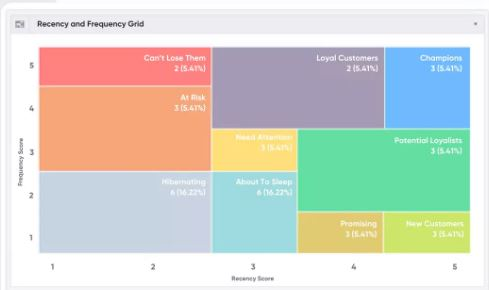